In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

In [4]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [6]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()


In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [8]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [9]:
def sigmoid(z):
    
    s = 1 / (1 + np.exp(-z))
    
    
    return s

In [10]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1))
    b = 0

    return w, b

In [11]:
def propagate(w, b, X, Y):
    
    
    m = X.shape[1]
    
    
    A = sigmoid(np.dot(w.T, X) + b)  
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [22]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    
    costs = []
    
    for i in range(num_iterations):
        
        
       
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs    
    

In [15]:
def predict(w, b, X):
    
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
   
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    
    
    return Y_prediction

In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
   
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 100000, learning_rate = 0.005)


In [30]:
d

{'costs': [np.float64(0.6931471805599453),
  np.float64(0.7410294145065183),
  np.float64(0.7531535818862111),
  np.float64(0.8667086956701202),
  np.float64(0.7685635006608347),
  np.float64(0.897014473644793),
  np.float64(0.7556132280568213),
  np.float64(0.8804366426839868),
  np.float64(0.7514852682041282),
  np.float64(0.8771330533999597),
  np.float64(0.7449403578103343),
  np.float64(0.869479030571014),
  np.float64(0.7395380761496434),
  np.float64(0.863181382786487),
  np.float64(0.7341140373099903),
  np.float64(0.8564988745006686),
  np.float64(0.7289883166665418),
  np.float64(0.8499947121719623),
  np.float64(0.7240300591410962),
  np.float64(0.843519150240876),
  np.float64(0.719248930310633),
  np.float64(0.8371297668639591),
  np.float64(0.7146178461453454),
  np.float64(0.8308196474365936),
  np.float64(0.7101237125685044),
  np.float64(0.8245968156414776),
  np.float64(0.7057525912197258),
  np.float64(0.8184627893088949),
  np.float64(0.7014932393013826),
  np.float

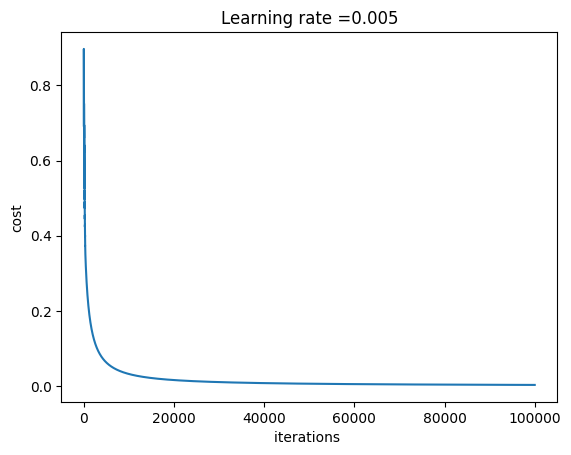

In [32]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()